In [21]:
import numpy as np
import matplotlib.pyplot as plt

0.0, 0.0, 99.9, 50.3


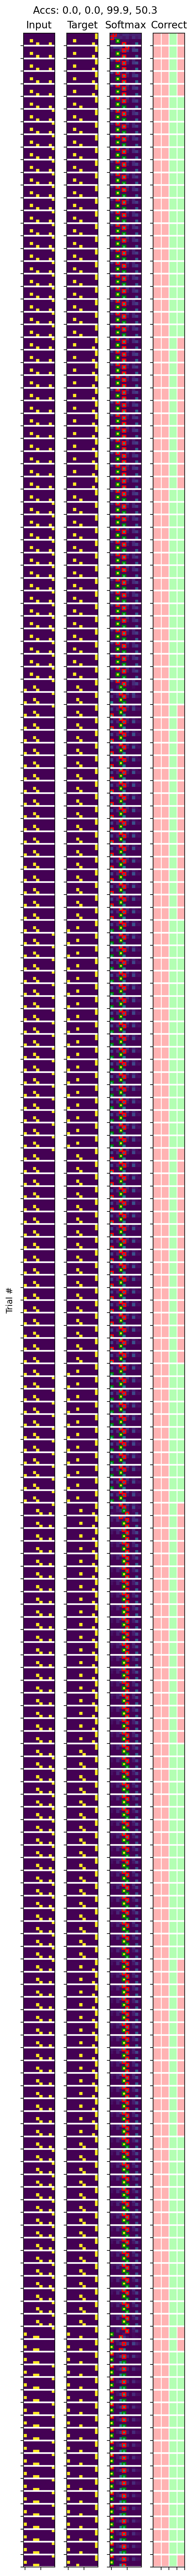

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

data = np.load('../data_800.npz')
inputs, targets, choices, accs = data.values()

b = 1
trials = 200
t = 4 * trials
sf = 1.1

fig, axes = plt.subplots(1,4, figsize=(sf*3, sf*t//20), dpi=200)
axes[0].imshow(inputs[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[0].set_title('Input')
axes[0].set_ylabel('Trial #')
axes[1].imshow(targets[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[1].set_title('Target')
axes[2].imshow(choices[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[2].set_title('Softmax')

# # Draw white lines every 4 rows
# for i in range(1, choices[b, :t, :].shape[0] // 4):
#     axes[0].axhline(y=i * 4 - 0.5, color='white', linewidth=2)
#     axes[1].axhline(y=i * 4 - 0.5, color='white', linewidth=2)
#     axes[2].axhline(y=i * 4 - 0.5, color='white', linewidth=2)

# Set yticks at every 4th row and enable gridlines only for those ticks
for i, ax in enumerate(axes):
    if i == len(axes)-1:
        start, gap, rows = 0.5, 1, trials
        ax.set_xticks(np.arange(0.5, 4, 1))
        ax.xaxis.grid(True, linestyle='-', color='white', linewidth=1)
    else:
        start, gap, rows = 3.5, 4, t
        ax.xaxis.grid(False)
    # Generate ytick locations, starting from 3.5 (since we want lines between blocks of 4)
    yticks = np.arange(start, rows, gap)
    ax.set_yticks(yticks)

    # Enable grid only for y-axis
    ax.yaxis.grid(True, linestyle='-', color='white', linewidth=2)

    # Optional: Hide x-axis grid lines
# Get the column indices of the largest value in each row of choices
max_choices = np.argmax(choices[b, :t, :], axis=1)
max_targets = np.argmax(targets[b, :t, :], axis=1)

# Iterate through each row and draw a red box around the cell with the largest value
for i, (choice, target) in enumerate(zip(max_choices, max_targets)):
    c = 'green' if choice==target else 'red'
    rect = patches.Rectangle((choice-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor=c, facecolor='none')
    axes[2].add_patch(rect)

correct = (np.argmax(choices, axis=-1) == np.argmax(targets, axis=-1)).reshape((choices.shape[0], choices.shape[1]//4, 4))
# axes[3].imshow(correct[b, :trials, :], aspect='auto')
axes[3].set_title('Correct')
# Create a color matrix with the same shape as your correct/incorrect matrix
# Initialize it fully transparent
color_matrix = np.zeros((*correct[b, :trials, :].shape, 4))

# Set red color with alpha=0.5 for cells with 0
color_matrix[correct[b, :trials, :] == 0] = [1, 0, 0, 0.3]  # Red with alpha 0.5

# Set green color with alpha=0.5 for cells with 1
color_matrix[correct[b, :trials, :] == 1] = [0, 1, 0, 0.3]  # Green with alpha 0.5

# Now identify rows where all values are 1 and set alpha=1.0 for those cells
all_correct_rows = np.all(correct[b, :trials, :] == 1, axis=1)
color_matrix[all_correct_rows, :, 3] = 1.0  # Set alpha to 1.0 for these rows

# Display the color matrix using imshow
axes[3].imshow(color_matrix, aspect='auto')

for ax in axes:
    ax.set_yticklabels([])
    ax.set_xticklabels([])

proportion_correct = 100 * np.sum(correct, axis=(0,1)) / (correct.shape[0]*correct.shape[1])
proportion_correct = ', '.join([f'{p:.1f}' for p in proportion_correct])
print(proportion_correct)
# Set the suptitle of the figure with the calculated proportion
fig.suptitle('Accs: ' + proportion_correct)

plt.tight_layout(rect=[0, 0, 1, 0.985]) # Adjust layout to make space for suptitle
plt.show()

fig.savefig('./data/panel.png')


In [43]:
from bayes import BayesAgent

batch_size = choices.shape[0]

agent = BayesAgent(batch_size=batch_size, p=1)

